<a href="https://colab.research.google.com/github/BrianM50/MAT-422/blob/main/Section_3_4_(Logistic_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
print('Logistic Regression is a model that uses a logistic function to model a binary dependent variable in its basic form.')

Logistic Regression is a model that uses a logistic function to model a binary dependent variable in its basic form.


In [5]:
# x has a column for a single input and ten rows each is an observation
# y has ten items of either 1 or 0, each being one observation
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Classification model
model = LogisticRegression(solver='liblinear', random_state=0)

# Model fitting which determines the coefficients that correspond to the best value of the cost function
model.fit(x, y)

PM = model.predict_proba(x)
print('This is the matrix that has the probabilities that predict whether the output is equal to zero or one.')
print(PM)
print('Each row of the matrix corresponds to one observation.')
print('The first column is the probability that the predicted output is zero.')
print('The second column is the probability that the predicted output is one.')

This is the matrix that has the probabilities that predict whether the output is equal to zero or one.
[[0.76881371 0.23118629]
 [0.68800809 0.31199191]
 [0.59387837 0.40612163]
 [0.49230569 0.50769431]
 [0.39136427 0.60863573]
 [0.29893328 0.70106672]
 [0.22042624 0.77957376]
 [0.15789351 0.84210649]
 [0.11058424 0.88941576]
 [0.07616801 0.92383199]]
Each row of the matrix corresponds to one observation.
The first column is the probability that the predicted output is zero.
The second column is the probability that the predicted output is one.


In [6]:
pred = model.predict(x)
print('The predicted output values as an array:')
print(pred, '\n')

score = model.score(x, y)
print('The accuracy of the model is ', score, '\n')

print('To get more information regarding the accuracy of the model, we can use a confusion matrix')
cm = confusion_matrix(y, pred)
print('Confusion Matrix: ')
print(cm)
print('The confusion matirx shows that: ')
print(' -There are three true negative predictions, which means the first three obserations being zeros is correct.')
print(' -There was no false negative predictions, meaning there was no observations that were wrongly predicted to be zeros.')
print(' -There was two false positive predictions, which means that the fourth and fifth observations were wrongly predicted as one when they should be zero.')
print(' -There was five true positive predictions, meaning the last six observations were correctly predicted as ones. ')

The predicted output values as an array:
[0 0 0 1 1 1 1 1 1 1] 

The accuracy of the model is  0.8 

To get more information regarding the accuracy of the model, we can use a confusion matrix
Confusion Matrix: 
[[3 2]
 [0 5]]
The confusion matirx shows that: 
 -There are three true negative predictions, which means the first three obserations being zeros is correct.
 -There was no false negative predictions, meaning there was no observations that were wrongly predicted to be zeros.
 -There was two false positive predictions, which means that the fourth and fifth observations were wrongly predicted as one when they should be zero.
 -There was five true positive predictions, meaning the last six observations were correctly predicted as ones. 


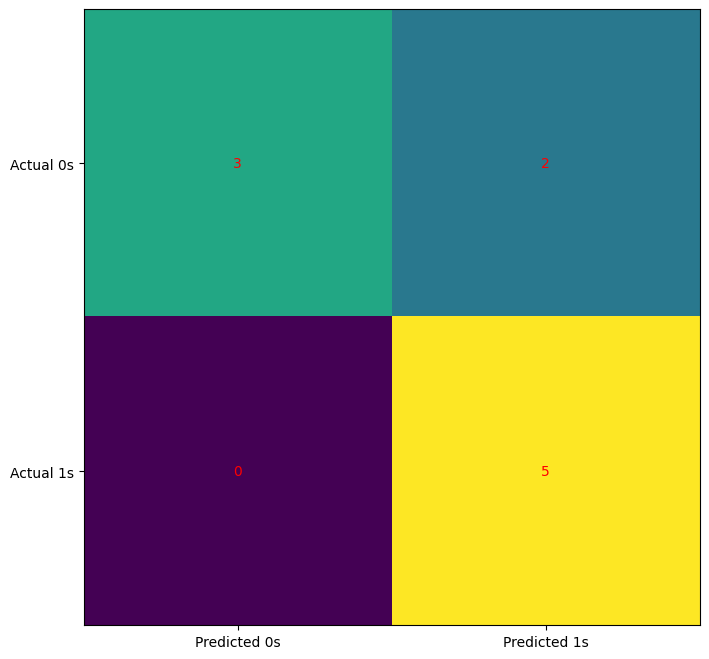

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.71      1.00      0.83         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10



In [7]:
# Heatmap that represents the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(y, pred))

In [9]:
print('To improve the model we can use different parameters, such as setting the regulariztion strength equal to 10.0 instead of 1.0. \n')

model2 = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model2.fit(x, y)

PM2 = model2.predict_proba(x)
print('Prediction Matrix: ')
print(PM2)

To improve the model we can use different parameters, such as setting the regulariztion strength equal to 10.0 instead of 1.0. 

Prediction Matrix: 
[[0.97979027 0.02020973]
 [0.94958202 0.05041798]
 [0.87976149 0.12023851]
 [0.73975066 0.26024934]
 [0.52477284 0.47522716]
 [0.30020373 0.69979627]
 [0.1428487  0.8571513 ]
 [0.06080627 0.93919373]
 [0.02453462 0.97546538]
 [0.00967652 0.99032348]]


In [10]:
pred2 = model2.predict(x)
print('The predicted output values as an array:')
print(pred2, '\n')

score2 = model2.score(x, y)
print('The accuracy of the model is ', score2, '\n')

cm2 = confusion_matrix(y, pred2)
print('Confusion Matrix: ')
print(cm2)

The predicted output values as an array:
[0 0 0 0 0 1 1 1 1 1] 

The accuracy of the model is  1.0 

Confusion Matrix: 
[[5 0]
 [0 5]]


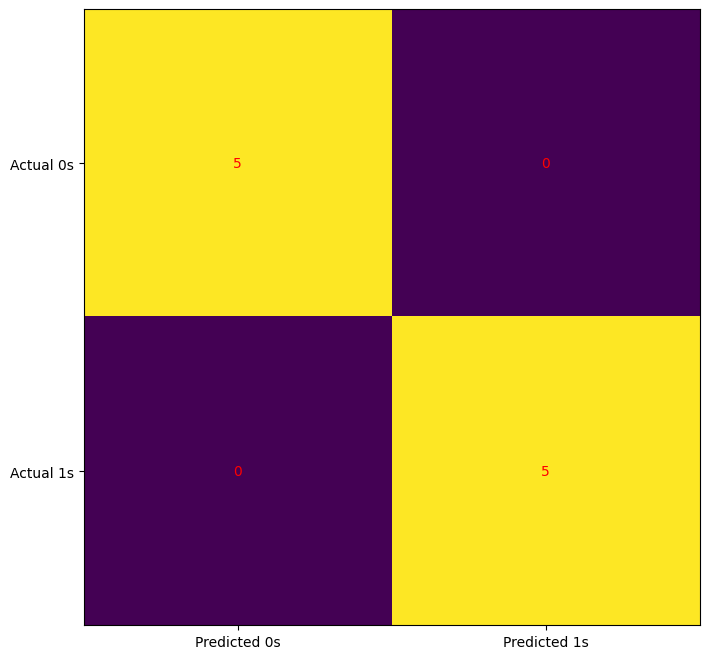

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [11]:
# Heatmap that represents the improved confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm2)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm2[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(y, pred2))